In [1]:
import sys
sys.path.append('../Codes/library/')
sys.path.append('../Codes/Python/')
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['text.usetex'] = True
import scipy.special as sc
from Immuno_models import*
import time

import warnings
warnings.filterwarnings('ignore')

Text_files_path = '/Users/robertomorantovar/Dropbox/Research/Evolution_Immune_System/Text_files/'

%autosave 60

Autosaving every 60 seconds


In [2]:
def P0_gaussian(k, d, L):
    return d**L*np.exp(-0.5*((((d-1)*L)/d)-k)**2/(((d-1)/(d**2))*L))/(np.sqrt(2*np.pi*(((d-1)/(d**2))*L))) 
def P0(k, d, L):
    return np.exp(k*(np.log((L/k)*(d-1))))


# MM Toy model

# $\rho = \binom{L}{k}(d-1)^k$

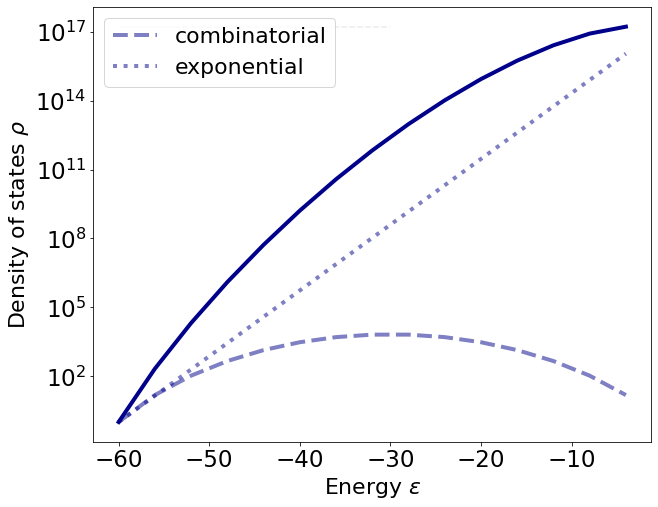

In [3]:
fig, ax = plt.subplots(figsize = (10,8))
L = 15 #Seq. lenght
d = 15 #Alphabet size
e0 = 4
k = np.arange(0 , int(L/1))+0.001;

ax.plot(e0*(k-L), sc.comb(L, k) , linewidth = 4 , label = 'combinatorial', color = 'darkblue', linestyle = '--', alpha = .5);
ax.plot(e0*(k-L), (d-1)**k , linewidth = 4, label = 'exponential' , color = 'darkblue', linestyle = 'dotted', alpha = .5);
ax.plot(e0*(k-L), sc.comb(L, k)*(d-1)**k , linewidth = 4 , color = 'darkblue', linestyle = '-');
#ax.vlines(-e0*L/d, ax.get_ylim()[0], ax.get_ylim()[1], linestyle = '--', alpha = .3, color = 'silver')
ax.hlines(sc.comb(L, L)*(d-1)**L, -L*e0, -(L/2)*e0, linestyle = '--', alpha = .3, color = 'silver')


ax.set_yscale('log');
ax.set_xlabel('Energy $\epsilon$', fontsize = 22)
ax.set_ylabel(r'Density of states $\rho$', fontsize = 22)
ax.tick_params(labelsize = 23)
ax.legend(loc = 0, fontsize = 22)


# $\lambda = \frac{1}{\epsilon_0}\log{\left(\frac{L}{k}(d-1)\right)}$

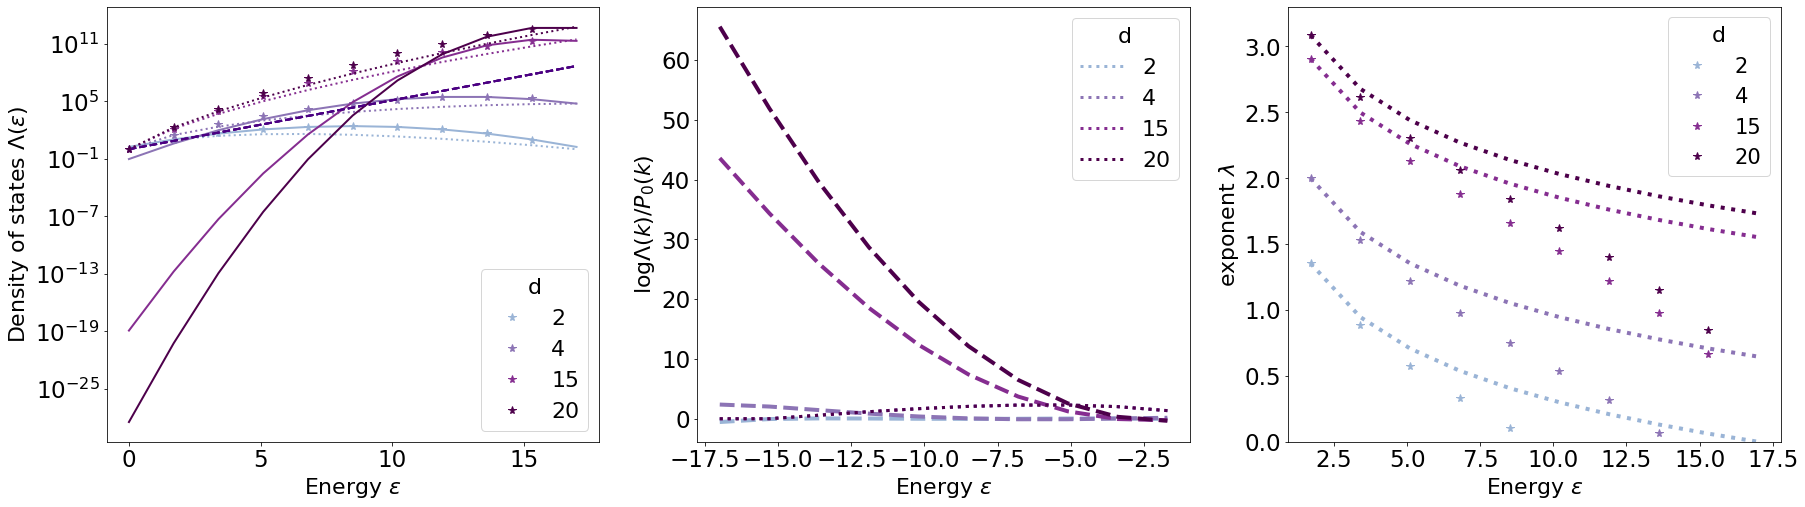

In [4]:
fig, ax = plt.subplots(1, 3, figsize = (30,8))

L = 10 #Seq. lenght
e0 = 1.7
ds = [2, 4, 15, 20]
k = np.arange(0 , L+1)+0.001

colors = plt.cm.BuPu(np.linspace(0,1,len(ds)+2))

for i, d in enumerate(ds):
    ax[0].plot(k*e0, sc.comb(L, k)*(d-1)**k , linewidth = 0 , label = '%.d'%d, color = colors[i+2], linestyle = '--', marker = '*', ms = 8);
    ax[0].plot(e0*(k), P0_gaussian(k, d, L) , linewidth = 2 , color = colors[i+2], linestyle = '-');
    ax[0].plot(e0*k, 1*np.exp((2-(4*0)/L)*k) , linewidth = 2 , color = 'indigo', linestyle = '--');
    ax[0].plot(e0*(k), P0(k, d, L) , linewidth = 2 ,color = colors[i+2], linestyle = ':');
    
    ax[1].plot(e0*(k-L), np.log((sc.comb(L, k)*(d-1)**k)/P0(k, d, L)), linewidth = 3 , label ='%.d'%d , color = colors[i+2], linestyle = ':');
    ax[1].plot(e0*(k-L), np.log((sc.comb(L, k)*(d-1)**k)/P0_gaussian(k, d, L)), linewidth = 4 , color = colors[i+2], linestyle = '--');

    ax[2].plot(e0*(k), (np.log(sc.comb(L, k)*(d-1)**(k)) - np.log(sc.comb(L, (k-1))*(d-1)**(k-1)))/e0 , linewidth = 4 , label = '%.d'%d, color = colors[i+2], linestyle = '', marker = '*', ms = 8);
    #ax[2].plot(e0*(k[1:]), (4*((d-1)/d) - (4*k[1:])/(L)), linewidth = 4 , label = 'Gaussian 2', color = colors[i+2], linestyle = '-', marker = '');
    #ax[2].plot(e0*(k[1:]), d - ((d**2*k[1:])/((d-1)*L)), linewidth = 4 ,  color = colors[i+2], linestyle = '--');
    ax[2].plot(e0*(k[1:]), np.ones_like(k[1:])*np.log((L/(k[1:]))*(d-1))/e0, linewidth = 4 , color = colors[i+2], linestyle = ':');
    #ax[2].plot(e0*(k[1:]), np.ones_like(k[1:])*np.log((d-1)/((L*e0)**(1/L)-1))/e0, linewidth = 4 , color = colors[i+2], linestyle = '-.');
    #ax[2].vlines(-e0*L/d, ax.get_ylim()[0], ax.get_ylim()[1], linestyle = '--', alpha = .3, color = 'silver')
        

#ax.hlines((d-1)**L, -(L-1)*e0, -(L-1)/2*e0, linestyle = '--', alpha = .3, color = 'silver')

#ax.set_ylim(bottom=1e-1, top = 1e13)
ax[0].set_yscale('log');
ax[0].set_xlabel('Energy $\epsilon$', fontsize = 22)
ax[0].set_ylabel(r'Density of states $\Lambda(\epsilon)$', fontsize = 22)
ax[0].tick_params(labelsize = 23)
ax[0].legend(loc = 4, fontsize = 22, title = 'd', title_fontsize = 22)

#ax.set_ylim(bottom= -2, top=4)
ax[1].set_xlabel('Energy $\epsilon$', fontsize = 22)
ax[1].set_ylabel(r'$\log{\Lambda(k)/P_0(k)}$', fontsize = 22)
ax[1].tick_params(labelsize = 23)
ax[1].legend(loc = 0, fontsize = 22, title = 'd', title_fontsize = 22)

ax[2].set_ylim(top=3.3, bottom = 0)
ax[2].set_xlabel(r'Energy $\epsilon$', fontsize = 22)
ax[2].set_ylabel(r'exponent $\lambda$', fontsize = 22)
ax[2].tick_params(labelsize = 23)
ax[2].legend(loc = 0, fontsize = 21, title = 'd', title_fontsize = 22)

#fig.savefig('../Figures/5_Geometric_exponent/Lambda_MM.png')


# Finding $\lambda$ using a artificial heat bath at imaginary temperature $T$

## Two-state model

In [5]:
def Z(T, d, L, e0):
    return (d-1+np.exp(e0/T))**L
def Z(T, d, L, e0):
    return ((d-1)*np.exp((-e0/(T)))+1)**L
def Zj(beta, d, L, e0):
    return ((d-1)*np.exp(-e0*beta)+(1))**L

def Z_integral(T, lamda):
    return np.exp(lamda*L*e0)*(1-np.exp(-L*(lamda-(1/T))*e0))/(lamda-(1/T))
def Z_integral(T, lamda, k):
    return (np.exp(L*(lamda-(1/T))*e0)-1)/(lamda-(1/T)) * k


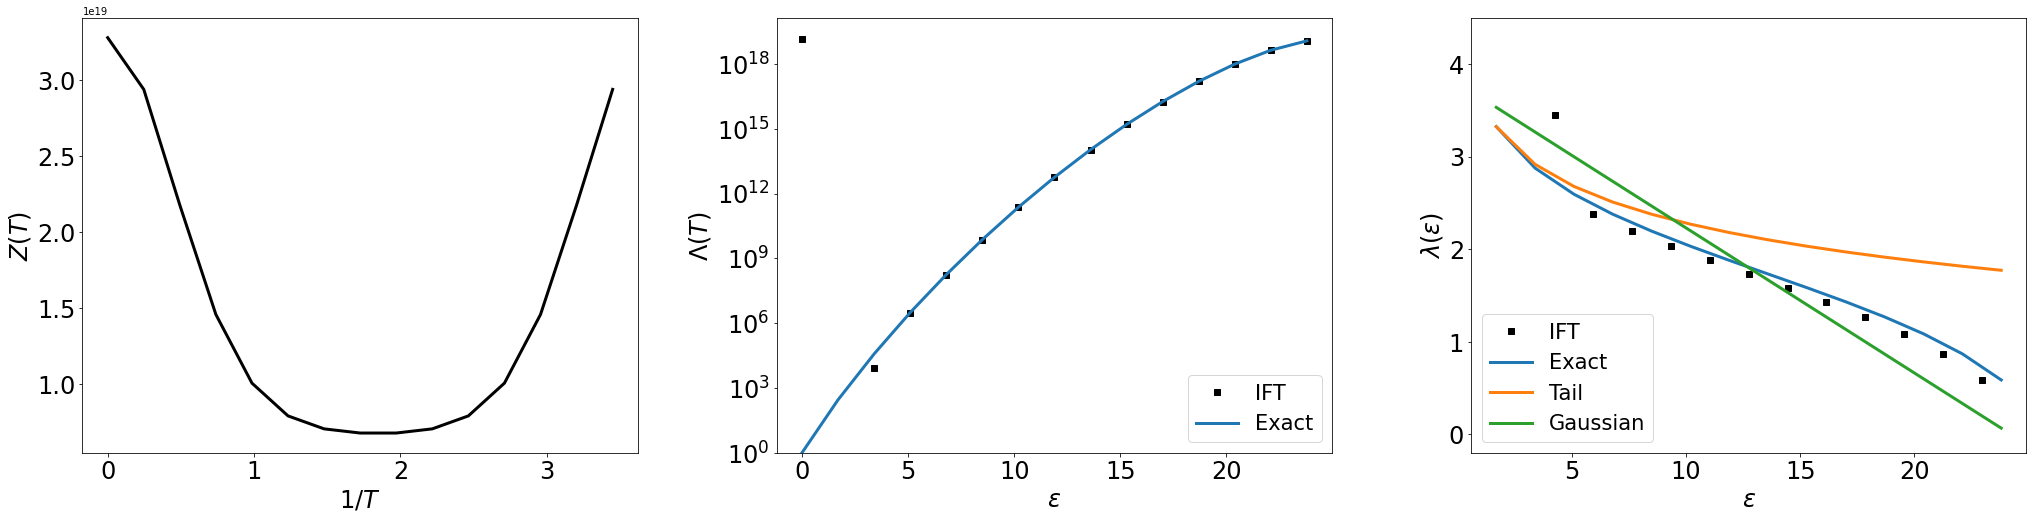

In [6]:
d=20
e0=1.7
L=15

fig, ax = plt.subplots(1, 3, figsize=(30,8), gridspec_kw={'left':0.05, 'right':0.95, 'wspace':.25})

Log10Tmin = np.log10(.5)
Log10Tmax = np.log10(10000)

ts = np.arange(0, L)
ks = np.arange(0, L)

ax[0].plot((2*np.pi*ts)/(L*e0), np.real(Zj((2*np.pi*1.j*ts)/(L*e0), d, L, e0)), color = 'black', linewidth = 3)
my_plot_layout(ax=ax[0], xscale = 'linear', yscale = 'linear', xlabel = '$1/T$', ylabel = '$Z(T)$')

L_ift = np.array([])
for e in ks*e0:
    L_ift = np.append(L_ift, np.cumsum(np.real(Zj(2*np.pi*1.j*ts/(L*e0), d, L, e0)*np.exp(2*np.pi*e*1.j*ts/(L*e0))))[-1]/L)
    
ax[1].plot(ks*e0, L_ift, color = 'k', linestyle = '', marker = 's', label = 'IFT')
ax[1].plot(e0*(ks), sc.comb(L, ks)*(d-1)**ks , linestyle = '-', label = 'Exact', linewidth = 3)

my_plot_layout(ax=ax[1], xscale = 'linear', yscale = 'log', xlabel = '$\epsilon$', ylabel = '$\Lambda(T)$')
ax[1].set_ylim(bottom=1)
ax[1].legend(loc = 0, fontsize = 21, title = '', title_fontsize = 22)

ax[2].plot((ks[1:]+ks[:-1])/2*e0, np.diff(np.log(L_ift))/np.diff(ks*e0), color = 'k', linestyle = '', marker = 's', label = 'IFT')
ax[2].plot(ks[1:]*e0, (np.log(sc.comb(L, ks[1:])*(d-1)**(ks[1:])) - np.log(sc.comb(L, (ks[1:]-1))*(d-1)**(ks[1:]-1)))/e0, label = 'Exact', linewidth = 3)
ax[2].plot(ks*e0, np.ones_like(ks)*np.log((L/(ks))*(d-1))/e0, label = 'Tail', linewidth = 3)
ax[2].plot(ks[1:]*e0, (4*((d-1)/d) - (4*ks[1:])/(L)), label = 'Gaussian', linewidth = 3)


my_plot_layout(ax=ax[2], xscale = 'linear', yscale = 'linear', xlabel = '$\epsilon$', ylabel = '$\lambda(\epsilon)$')
#ax[2].set_xlim(right=avg_E+1)
ax[2].set_ylim(bottom=-.2, top = 4.5)
ax[2].legend(loc = 3, fontsize = 21, title = '', title_fontsize = 22)

fig.savefig('../Figures/5_Geometric_exponent/MM_Z_lambda_d-%d.png'%d)



## Using a general PWM

In [7]:
def Z_PWM(PWM, T):
    Z = 1
    for i in range(len(PWM[0,:])):
        Z_i = 0
        for j in range(len(PWM[:,0])):
            Z_i = Z_i + np.exp((-PWM[j, i]/T))
        Z = Z*Z_i
    return Z

def Z_PWMj(PWM, beta):
    Z = 1
    for i in range(len(PWM[0,:])):
        Z_i = 0.j
        for j in range(len(PWM[:,0])):
            Z_i = Z_i + np.exp(-PWM[j, i]*beta)
        Z = Z*Z_i
    return Z

def Z_PWM_integral(T, lamda, k):
    return np.exp(-lamda*min_E)*(np.exp(max_E*(lamda-(1/T)))-np.exp(min_E*(lamda-(1/T))))/(lamda-(1/T))*k

def Z_PWM_integral2(T, lamda):
    return 2*np.exp(-lamda*min_E)*(np.exp(avg_E*(lamda-(1/T)))-np.exp(min_E*(lamda-(1/T))))/(lamda-(1/T))



FMLFMAVFVMTSWYC [ 2  1  4  2  1  8  5  2  5  1 10 11  6  7  0]
0.43849999999999995


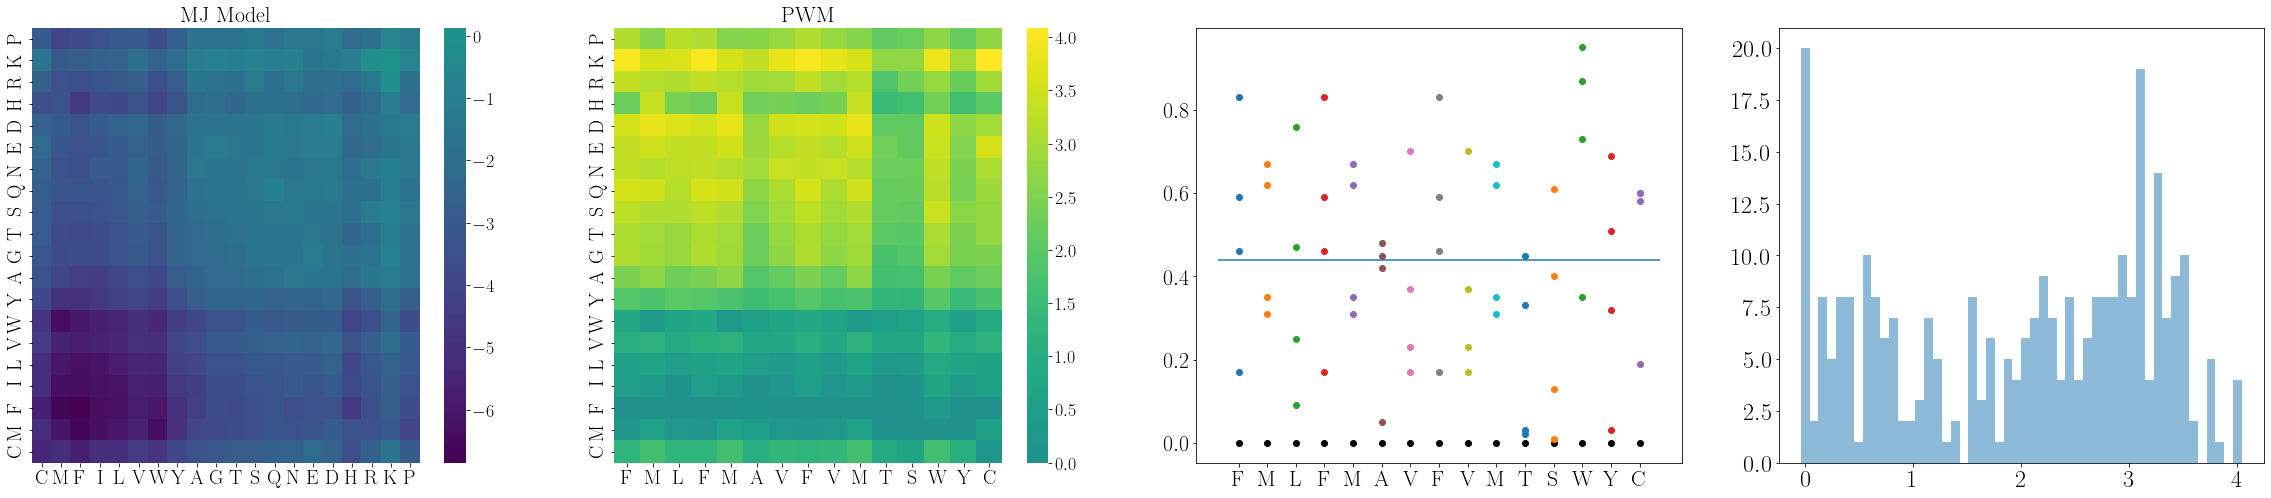

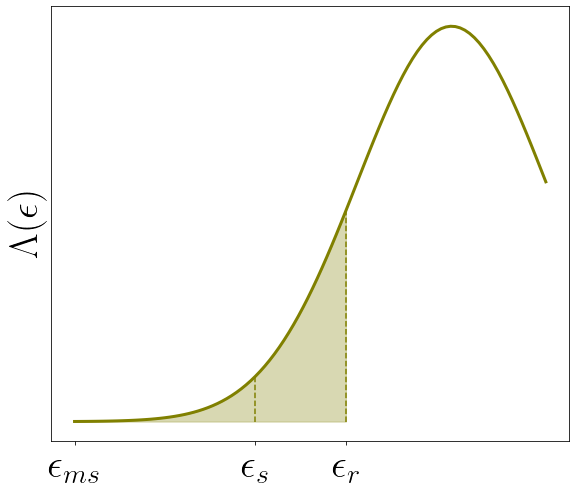

In [23]:
Matrix = 'BLOSUM62'
Matrix = 'MJ2'
#Matrix = 'MM'

fig, ax = plt.subplots(1, 4, figsize=(40,8))

#w, v = LA.eig(M2_list)
if(Matrix == 'MJ2'):
    M2 = np.loadtxt(Text_files_path + Matrix + '.txt', skiprows= 1, usecols=range(1,21))
    M2_list = M2.tolist()
    Alphabet = np.loadtxt(Text_files_path + 'Alphabet.txt', dtype=bytes, delimiter='\t').astype(str)
    Alphabet_list = Alphabet.tolist()
    plot_energy_matrix(Energy_Matrix=M2_list, Alphabet=Alphabet, title=r'MJ Model', ax = ax[0])
    
if(Matrix == 'MM'):
    M2 = (np.loadtxt(Text_files_path + Matrix + '.txt')+1)*e0
    M2_list = M2.tolist()
    Alphabet = np.loadtxt(Text_files_path + 'Alphabet.txt', dtype=bytes, delimiter='\t').astype(str)
    Alphabet_list = Alphabet.tolist()
    plot_energy_matrix(Energy_Matrix=M2_list, Alphabet=Alphabet, title=r'MJ Model', ax = ax[0])
if(Matrix == 'BLOSUM62'):
    M2 = np.loadtxt(Text_files_path + Matrix + '.txt', skiprows= 1, usecols=range(1,25))
    M2_list = M2.tolist()
    Alphabet = np.array(['A', 'R'  ,'N' , 'D'  ,'C' , 'Q'  ,'E'  ,'G'  ,'H' , 'I'  ,'L'  ,'K'  ,'M' , 'F' , 'P' , 'S'  ,'T' , 'W' , 'Y' , 'V' , 'B' , 'Z'  ,'X',  '*'])
    Alphabet_list = Alphabet.tolist()
    plot_energy_matrix(Energy_Matrix=M2_list, Alphabet=Alphabet, title=r'BLOSUM62 Model', ax = ax[0])
L_alphabet = len(Alphabet)
#----------------------------------------------------------------------

#antigen_seq = np.random.randint(0, len(Alphabet), L)
#antigen = Alphabet[antigen_seq]
antigen = 'FMLFMAVFVMTSWYC'
L = len(antigen)
antigen_list = [i for i in antigen]
contributions = np.zeros(shape = (1,20))
antigen_seq = np.array([], dtype = int)
for i, aa in enumerate(antigen_list):
    index = Alphabet_list.index(aa)
    antigen_seq = np.append(antigen_seq, int(index))
print(antigen, antigen_seq)
antigen_seq, antigen
PWM = M2[:,antigen_seq]
for i in np.arange(L):
    PWM[:,i]-=np.min(PWM[:,i], axis=0)

PWM_list = PWM.tolist()
plot_PWM(PWM=PWM_list, Alphabet=Alphabet, sequence = antigen, title=r'PWM', ax = ax[1])
min_E = np.sum([np.min(PWM[:,i]) for i in range(len(PWM[0,:]))])
avg_E = np.sum([np.mean(PWM[:,i]) for i in range(len(PWM[0,:]))])
var_E = np.sum([np.var(PWM[:,i]) for i in range(len(PWM[0,:]))])
max_E = np.sum([np.max(PWM[:,i]) for i in range(len(PWM[0,:]))])
#----------------------------------------------------------------------

d_eff = 4
mean_lowest_effect=0
for i, index in enumerate(antigen_seq):
    ax[2].scatter(i, np.sort(PWM[:,i])[0], color = 'black')
    ax[2].scatter(np.ones(d_eff)*i, np.sort(PWM[:,i])[1:d_eff+1])
    mean_lowest_effect+=np.mean(np.sort(PWM[:,i])[1:d_eff+1]-np.sort(PWM[:,i])[0])
mean_lowest_effect/=L
print(mean_lowest_effect)
ax[2].hlines(mean_lowest_effect, ax[2].get_xlim()[0], ax[2].get_xlim()[1])
ax[2].set_xticks(range(L))
ax[2].set_xticklabels(antigen)
ax[2].tick_params(labelsize = 22)
#----------------------------------------------------------------------

linear_PWM = np.reshape(PWM, (L*20,1))
ax[3].hist(linear_PWM, bins = 50, alpha = .5, align='left')
my_plot_layout(ax=ax[3])
fig.savefig('../Figures/5_Geometric_exponent/PWM_model.png')

fig, ax = plt.subplots(figsize=(10,8), gridspec_kw={'left':0.18})
def Lambda_e(es):
    return (2*np.pi*var_E)**(-0.5)*np.exp(-(es)**2/(2))
es = np.linspace(-4, 1, 100)
ax.plot(es, Lambda_e(es), color = 'olive', linewidth = 3)
ax.vlines([es[38],es[57]], 0, [Lambda_e(es[38]), Lambda_e(es[57])], color = 'olive', linestyle = 'dashed')
ax.fill_between(es[:57+1], np.zeros_like(es[:57+1]), (2*np.pi*var_E)**(-0.5)*np.exp(-(es[:57+1])**2/(2)), color = 'olive', alpha = .3)
ax.set_yticks([])
ax.set_xticks([es[0], es[38],es[57]])
ax.set_xticklabels([r'$\epsilon_{ms}$', r'$\epsilon_s$', r'$\epsilon_r$'], fontsize = 40)
ax.set_ylabel(r'$\Lambda(\epsilon)$', fontsize= 40)
fig.savefig('../Figures/5_Geometric_exponent/gaussian_cartoon.pdf')

0.43849999999999995


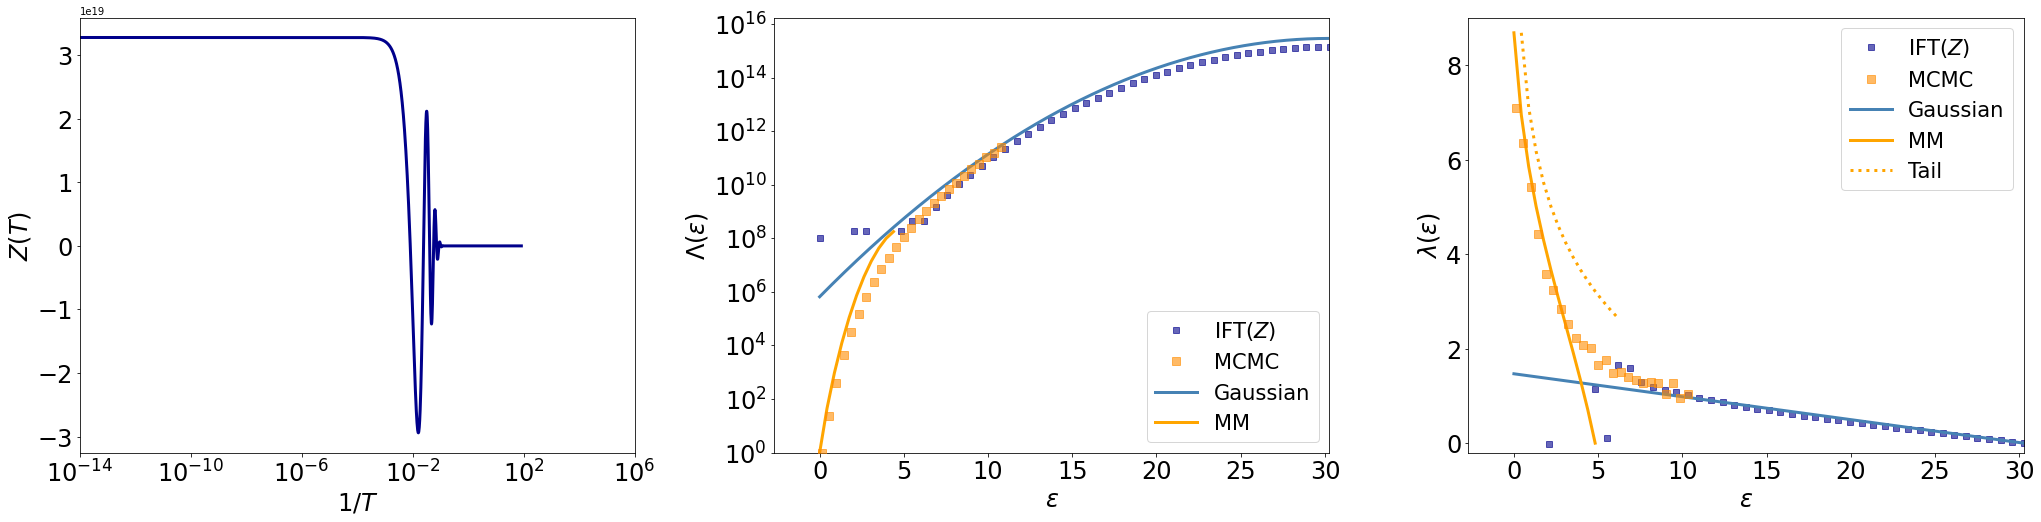

In [452]:
fig, ax = plt.subplots(1, 3, figsize=(30,8), gridspec_kw={'left':0.05, 'right':0.95, 'wspace':.25})


# --------------- MCMC -------dynamics--------
T = .5
ks = np.arange(0, L)
d = d_eff
es = np.linspace(min_E, max_E, 10000)
de = es[1]-es[0]
e0 = mean_lowest_effect

print(e0)
N_MCMC = 1e8
data_MCMC=np.loadtxt(Text_files_path + 'MCMC/energies_L-%d_T-%.6f_N-%d_Antigen-'%(L,T, N_MCMC)+antigen+'.txt')
data_MCMC_rho = np.histogram(data_MCMC, bins = 80, density = False) # Creating histograms
e_MS = np.min(data_MCMC)

e_max_MCMC = data_MCMC_rho[1][-2]
e_min_MCMC = data_MCMC_rho[1][0]

e_MCMC = data_MCMC_rho[1][:-1] + abs(data_MCMC_rho[1][1:]-data_MCMC_rho[1][:-1])/2
rho_e_MCMC = (data_MCMC_rho[0]/(np.exp(-e_MCMC/T)))/(data_MCMC_rho[0][0]/(np.exp(-e_MCMC[0]/T)))
#----------------------------------------------------------------------
bs = np.logspace(-80, 1.92, 10000)
db = np.diff(bs)
es_ift = np.linspace(min_E, max_E, 80)
#----------------------------------------------------------------------
ax[0].plot(bs, np.real(Z_PWMj(PWM, 2*np.pi*1.j*bs)), color = 'darkblue', linewidth = 3)
my_plot_layout(ax=ax[0], xscale = 'log', yscale = 'linear', xlabel = '$1/T$', ylabel = '$Z(T)$')
ax[0].set_xlim(left=1e-14)
#----------------------------------------------------------------------
L_ift = np.array([])
for e in es_ift:
    L_ift = np.append(L_ift, (np.real(np.cumsum(Z_PWMj(PWM, 2*np.pi*bs[1:]*1.j)*np.exp(2*np.pi*bs[1:]*1.j*e)*db)[-1])))

ax[1].plot(es_ift, 1e-3*L_ift, linestyle = '', marker = 's', label = r'IFT$(Z)$', color = 'darkblue', alpha=.6)
ax[1].plot(e_MCMC[:-30:2]-e_MS, rho_e_MCMC[:-30:2], linestyle = "", marker = 's', color = 'darkorange', ms = 8, alpha = .6, label = 'MCMC',zorder=20)
ax[1].plot(es, 1e-3*(20**L)*(2*np.pi*var_E)**(-0.5)*np.exp(-(es-(avg_E))**2/(2*var_E)), label = 'Gaussian', linewidth = 3, color = 'steelblue')
ax[1].plot(e0*(ks[:-4]), sc.comb(L, ks[:-4])*(d-1)**ks[:-4] , linestyle = '-', label = 'MM', linewidth = 3, color = 'orange')

my_plot_layout(ax=ax[1], xscale = 'linear', yscale = 'log', xlabel = '$\epsilon$', ylabel = '$\Lambda(\epsilon)$')
ax[1].set_ylim(bottom=1)
ax[1].set_xlim(right=avg_E)
ax[1].legend(loc = 4, fontsize = 21, title = '', title_fontsize = 22)
#----------------------------------------------------------------------
ax[2].plot((es_ift[:-1]), np.diff(np.log(L_ift))/np.diff(es_ift), color = 'darkblue', linestyle = '', marker = 's', label = r'IFT$(Z)$', alpha = .6)
ax[2].plot((e_MCMC[:-30:2][:-1])-e_MS, np.diff(np.log(rho_e_MCMC[:-30:2]))/np.diff(e_MCMC[:-30:2]), linestyle = "", marker = 's', color = 'darkorange', ms = 8, alpha = .6, label = 'MCMC',zorder=20)
ax[2].plot(es, -(es-avg_E)/(var_E), label = 'Gaussian', linewidth = 3, color = 'steelblue')
ax[2].plot(e0*(ks[:-2][:-1]), np.diff(np.log(sc.comb(L, ks[:-2])*(d-1)**(ks[:-2])))/(np.diff(ks[:-2])*e0), linestyle = '-', label = 'MM', linewidth = 3, color = 'orange')
ax[2].plot(e0*(ks[:]), np.ones_like(ks[:])*np.log((L/(ks[:]))*(d-1))/e0, label = 'Tail', linewidth = 3, color = 'orange', linestyle = ':')


my_plot_layout(ax=ax[2], xscale = 'linear', yscale = 'linear', xlabel = '$\epsilon$', ylabel = '$\lambda(\epsilon)$')
ax[2].set_xlim(right=avg_E)
ax[2].set_ylim(bottom=-.2, top = 9)
ax[2].legend(loc = 0, fontsize = 21, title = '', title_fontsize = 22)
#----------------------------------------------------------------------
fig.savefig('../Figures/5_Geometric_exponent/PWM_Z_lambda.pdf')


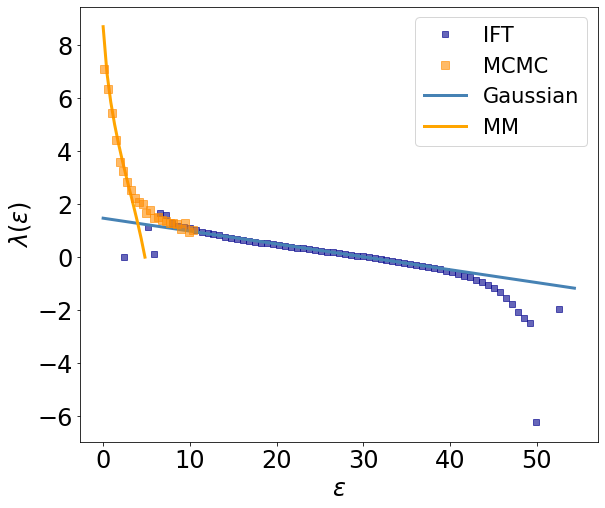

In [455]:
fig, ax = plt.subplots(figsize=(10,8), gridspec_kw={'left':0.18, 'wspace':.25})

ks = np.arange(0, L)
d = d_eff
e0 = mean_lowest_effect

ax.plot((es_ift[1:]+es_ift[:-1])/2, np.diff(np.log(L_ift))/np.diff(es_ift), color = 'darkblue', linestyle = '', marker = 's', label = 'IFT', alpha = .6)
ax.plot((e_MCMC[:-30:2][:-1])/1-e_MS, np.diff(np.log(rho_e_MCMC[:-30:2]))/np.diff(e_MCMC[:-30:2]), linestyle = "", marker = 's', color = 'darkorange', ms = 8, alpha = .6, label = 'MCMC',zorder=20)
ax.plot(es, -(es-avg_E)/(var_E), label = 'Gaussian', linewidth = 3, color = 'steelblue')
ax.plot(e0*ks[:-2][:-1], np.diff(np.log(sc.comb(L, ks[:-2])*(d-1)**(ks[:-2])))/(np.diff(ks[:-2]*e0)), label = 'MM', linewidth = 3, color = 'orange')
#ax.plot(e0*ks[:]+e_MS, np.ones_like(ks[:])*np.log((L/(ks[:]))*(d-1))/e0, label = 'Tail', linewidth = 3)
#ax.plot(e0*ks[:-2]+e_MS, (4*((d-1)/d) - (4*ks[:-2])/(L)), label = 'Gaussian', linewidth = 3)


my_plot_layout(ax=ax, xscale = 'linear', yscale = 'linear', xlabel = '$\epsilon$', ylabel = '$\lambda(\epsilon)$')
#ax.set_xlim(right=avg_E+1)
#ax.set_ylim(bottom=-.2, top = 10.5)
ax.legend(loc = 0, fontsize = 21, title = '', title_fontsize = 22)



# Canonical ensemble of BCRs

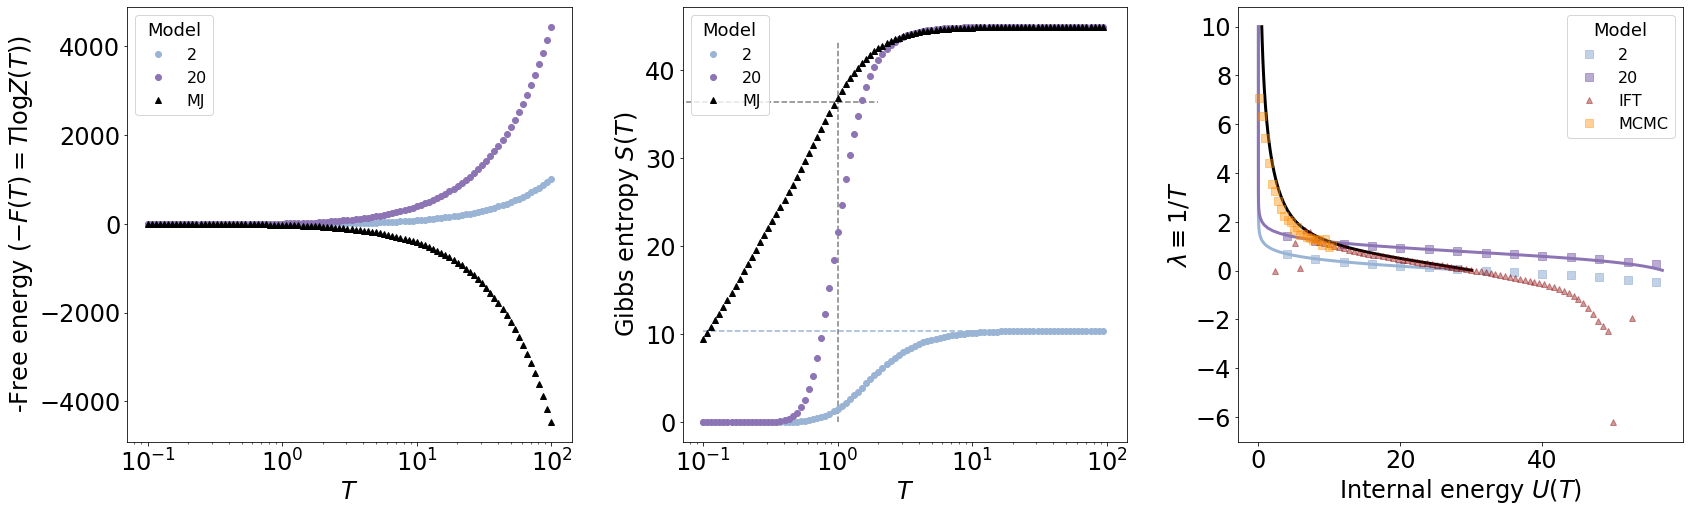

In [458]:
ds=[2, 20]
L=15

es = np.linspace(min_E-10, max_E+20, 10000)
de = es[1]-es[0]
e0 = 4
d = d_eff

Log10Tmin = np.log10(.1)
Log10Tmax = np.log10(100)

Ts = np.logspace(Log10Tmin, Log10Tmax, 100)

fig, ax = plt.subplots(1, 3, figsize=(30,8), gridspec_kw={'left':0.18, 'wspace':.25})
#-----------
for i, d in enumerate(ds):
    F = -Ts*np.log(Z(Ts, d, L, e0))
    ax[0].plot(Ts, -F, linewidth = 4, linestyle='', marker = 'o', label = '%d'%d, color = colors[i+2])
    
    a = ax[1].plot(Ts[:-1], -np.diff(F)/np.diff(Ts), linewidth = 4, linestyle='', marker = 'o', label = '%d'%d, color = colors[i+2])
    ax[1].hlines(np.log(np.power(d, L)), 10**Log10Tmin, 10**Log10Tmax, linestyle='--', color = colors[i+2])
    
    ax[2].plot(F[:-1] -Ts[:-1]*(np.diff(F)/np.diff(Ts)), 1/Ts[:-1], linewidth = 3, color=colors[i+2])
    ax[2].plot(ks[1:]*e0, (np.log(sc.comb(L, ks[1:])*(d-1)**(ks[1:])) - np.log(sc.comb(L, (ks[1:]-1))*(d-1)**(ks[1:]-1)))/e0, label = '%d'%d, linewidth = 3, color=colors[i+2], linestyle = "", marker = 's', ms = 8, alpha = .6)


#-----------    
Log10Tmin = np.log10(.1)
Log10Tmax = np.log10(100)

Ts = np.logspace(Log10Tmin, Log10Tmax, 100)

F_PWM = -Ts*np.log(Z_PWM(PWM, Ts))

ax[0].plot(Ts, F_PWM, color = 'black', linestyle='', marker = '^', label ='MJ')
    
ax[1].plot(Ts[:-1], -np.diff(F_PWM)/np.diff(Ts), color = 'black', linestyle='', marker = '^', label ='MJ')

p_PWM = np.exp(-PWM)/np.sum(np.exp(-PWM), axis=0)
s_PWM = -np.sum(p_PWM*np.log(p_PWM))


ax[1].hlines(s_PWM, Log10Tmin, Log10Tmax, linestyle = '--', color = 'grey')

ax[1].vlines(1, 0, np.log(np.power(18, L)), linestyle = '--', color = 'grey')

es = np.linspace(min_E, max_E, 80)
ax[2].plot(F_PWM[:-1] -Ts[:-1]*(np.diff(F_PWM)/np.diff(Ts)), 1/Ts[:-1], linewidth = 3, color='black')
ax[2].plot((es[1:]+es[:-1])/2, np.diff(np.log(L_ift))/np.diff(es), color = 'darkred', linestyle = '', marker = '^', label = 'IFT', alpha = .4)
ax[2].plot((e_MCMC[:-30:2][:-1])/1-e_MS, np.diff(np.log(rho_e_MCMC[:-30:2]))/np.diff(e_MCMC[:-30:2]), linestyle = "", marker = 's', color = 'darkorange', ms = 8, alpha = .4, label = 'MCMC',zorder=20)


#-----------
ax[0].legend(loc = 0, fontsize = 16, title = r'Model', title_fontsize = 18)
my_plot_layout(ax=ax[0], xscale = 'log', yscale = 'linear', xlabel = '$T$', ylabel = '-Free energy $(-F(T)=T\log{Z(T)})$')    

ax[1].legend(loc = 0, fontsize = 16, title = r'Model', title_fontsize = 18)
my_plot_layout(ax=ax[1], xscale = 'log', yscale = 'linear', xlabel = '$T$', ylabel = 'Gibbs entropy $S(T)$')

ax[2].legend(loc = 0, fontsize = 16, title = r'Model', title_fontsize = 18)
my_plot_layout(ax=ax[2], xscale = 'linear', yscale = 'linear', ylabel = '$\lambda \equiv 1/T$', xlabel = 'Internal energy $U(T)$')

fig.savefig('../Figures/5_Geometric_exponent/F_and_S_MM_vs_MJ.png')
#-----------



## MM Model

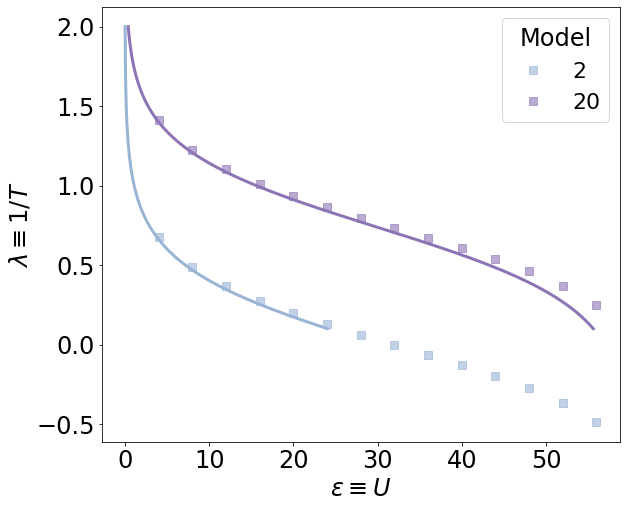

In [459]:
ds=[2, 20]

L=15
e0 = 4

Log10Tmin = np.log10(.5)
Log10Tmax = np.log10(10)

Ts = np.logspace(Log10Tmin, Log10Tmax, 500)

fig, ax = plt.subplots(figsize=(10,8), gridspec_kw={'left':0.18})

for i, d in enumerate(ds):
    F = -Ts*np.log(Z(Ts, d, L, e0))
    ax.plot(F[:-1]-Ts[:-1]*(np.diff(F)/np.diff(Ts)) , 1/Ts[:-1], linewidth = 3, color=colors[i+2])
    #ax.plot(Ts[:-1]**2*np.diff(np.log(Z(Ts, d, L, e0)))/np.diff(Ts) , 1/Ts[:-1], linestyle = '', linewidth = 3, marker = '^', alpha=.5, color=colors[i+2], ms=3)
    ax.plot(ks[1:]*e0, (np.log(sc.comb(L, ks[1:])*(d-1)**(ks[1:])) - np.log(sc.comb(L, (ks[1:]-1))*(d-1)**(ks[1:]-1)))/e0, label = '%d'%d, linewidth = 3, color=colors[i+2], linestyle = "", marker = 's', ms = 8, alpha = .6)


ax.legend(loc = 0, fontsize = 22, title = r'Model', title_fontsize = 24)
my_plot_layout(ax=ax, xscale = 'linear', yscale = 'linear', ylabel = '$\lambda\equiv 1/T$', xlabel = r'$\epsilon\equiv U$')
fig.savefig('../Figures/5_Geometric_exponent/lambda_MM_canonical.pdf')



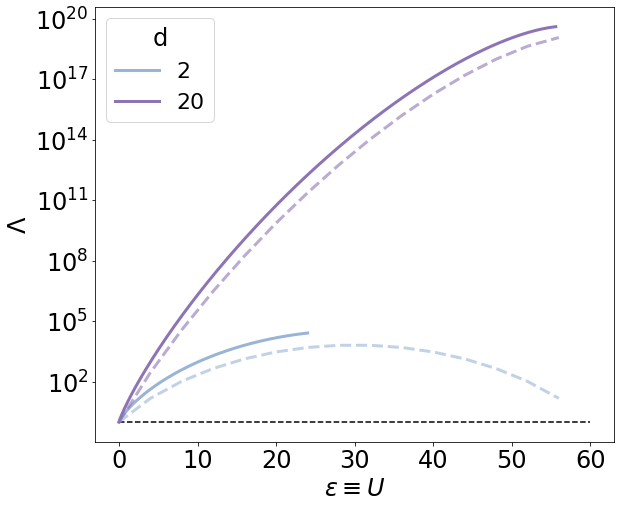

In [460]:
fig, ax = plt.subplots(figsize=(10,8), gridspec_kw={'left':0.18})
e0 = 4
d = d_eff
L=15

Log10Tmin = np.log10(.011)
Log10Tmax = np.log10(10)

Ts = np.logspace(Log10Tmin, Log10Tmax, 1000)

for i, d in enumerate(ds):
    
    F = -Ts*np.log(Z(Ts, d, L, e0))
    Us = F[:-1]-Ts[:-1]*(np.diff(F)/np.diff(Ts))
    dU = np.diff(Us)
    s = np.cumsum((1/Ts[:-2])*dU)
    ax.plot(Us[:-1], np.exp(s), linewidth = 3, color=colors[i+2],label = '%d'%d)
    ax.plot(ks[:]*e0, sc.comb(L, ks[:])*(d-1)**(ks[:]), linewidth = 3, color=colors[i+2], linestyle = '--', marker = '', ms = 8, alpha = .6)


ax.hlines(1, 0, L*e0, color = 'black', linestyle = '--')

#ax.plot(Ts[:-1]**2*np.diff(np.log(Z_PWM(PWM, Ts)))/np.diff(Ts) , 1/Ts[:-1], linestyle = '--', linewidth = 3, marker = '', alpha=.5, color='black', ms=2)

#ax.plot(es[:-30], -(es[:-30]-avg_E)/(var_E), label = 'Gaussian', linewidth = 3, color = 'grey', linestyle = '--')
#ax.plot(e0*ks[:-2][:-1]+e_MS, np.diff(np.log(sc.comb(L, ks[:-2])*(d-1)**(ks[:-2])))/(np.diff(ks[:-2]*e0)), label = 'MM', linewidth = 3, color = 'grey', linestyle = ':')
#ax.plot(((es[1:]+es[:-1])/2)[:-35], (np.diff(np.log(L_ift))/np.diff(es))[:-35], color = 'darkblue', linestyle = '', marker = '^', label = 'IFT', alpha = .5, ms = 10)
#ax.plot((e_MCMC[:-30:2][:-1])/1, np.diff(np.log(rho_e_MCMC[:-30:2]))/np.diff(e_MCMC[:-30:2]), linestyle = "", marker = 's', color = 'darkorange', ms = 8, alpha = .5, label = 'MCMC',zorder=20)

ax.legend(loc = 0, fontsize = 22, title = r'd', title_fontsize = 24)
my_plot_layout(ax=ax, xscale = 'linear', yscale = 'log', ylabel = '$\Lambda$', xlabel = r'$\epsilon\equiv U$')



## PWM model

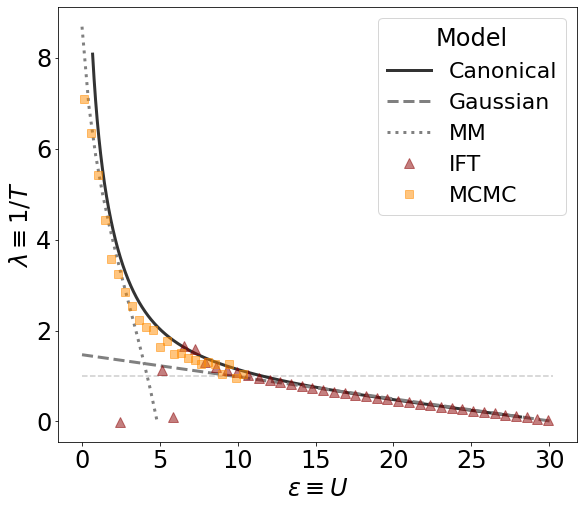

In [461]:
Log10Tmin = np.log10(.14)
Log10Tmax = np.log10(100)

es = np.linspace(min_E, avg_E, 10000)
de = es[1]-es[0]
e0 = mean_lowest_effect
d = d_eff

#Ts = np.logspace(Log10Tmin, Log10Tmax, 1000)
Ts = np.linspace(Tmin, Tmax, 10000)
F_PWM = -Ts*np.log(Z_PWM(PWM, Ts))
fig, ax = plt.subplots(figsize=(10,8), gridspec_kw={'left':0.18})

Us = F_PWM[:-1]-Ts[:-1]*(np.diff(F_PWM)/np.diff(Ts))
lambdas = 1/Ts[:-1]
ax.plot(Us, lambdas, color = 'black', linewidth = 3, label = 'Canonical', alpha = .8, linestyle = '-')
#ax.plot(Ts[:-1]**2*np.diff(np.log(Z_PWM(PWM, Ts)))/np.diff(Ts) , 1/Ts[:-1], linestyle = '--', linewidth = 3, marker = '', alpha=.5, color='black', ms=2)

ax.plot(es[:-30], -(es[:-30]-avg_E)/(var_E), label = 'Gaussian', linewidth = 3, color = 'grey', linestyle = '--')
ax.plot(e0*ks[:-2][:-1], np.diff(np.log(sc.comb(L, ks[:-2])*(d-1)**(ks[:-2])))/(np.diff(ks[:-2]*e0)), label = 'MM', linewidth = 3, color = 'grey', linestyle = ':')
ax.plot(((es_ift[1:]+es_ift[:-1])/2)[:-35], (np.diff(np.log(L_ift))/np.diff(es_ift))[:-35], color = 'darkred', linestyle = '', marker = '^', label = 'IFT', alpha = .5, ms = 10)
ax.plot((e_MCMC[:-30:2][:-1])/1-e_MS, np.diff(np.log(rho_e_MCMC[:-30:2]))/np.diff(e_MCMC[:-30:2]), linestyle = "", marker = 's', color = 'darkorange', ms = 8, alpha = .5, label = 'MCMC',zorder=20)
ax.hlines(1, min_E, avg_E, color = 'black', linestyle = '--', alpha=.2)


ax.legend(loc = 0, fontsize = 22, title = r'Model', title_fontsize = 24)
my_plot_layout(ax=ax, xscale = 'linear', yscale = 'linear', ylabel = '$\lambda\equiv 1/T$', xlabel = r'$\epsilon\equiv U$')
fig.savefig('../Figures/5_Geometric_exponent/lambda_PWM_canonical.pdf')


5.294968523160564e-05
0.999999999999975


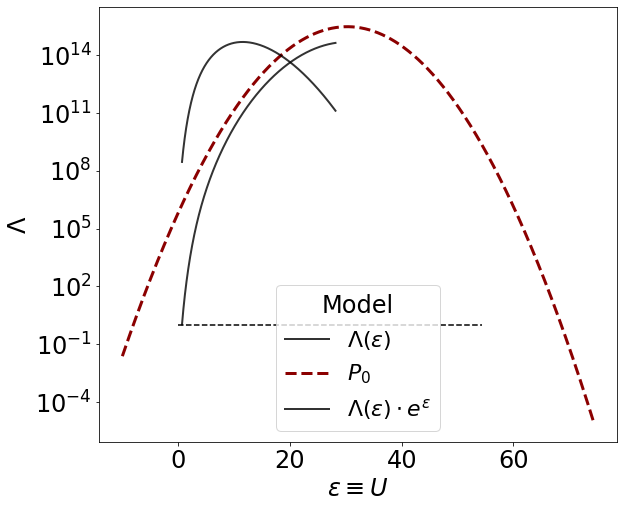

In [462]:
Tmin = .1238
Tmax = 10

es = np.linspace(min_E-10, max_E+20, 10000)
de = es[1]-es[0]
e0 = mean_lowest_effect
d = d_eff

Ts = np.logspace(Tmin, Tmax, 10)

Ts = np.linspace(Tmin, Tmax, 10000)

F_PWM = -Ts*np.log(Z_PWM(PWM, Ts))

fig, ax = plt.subplots(figsize=(10,8), gridspec_kw={'left':0.18})

Us = F_PWM[:-1]-Ts[:-1]*(np.diff(F_PWM)/np.diff(Ts))
dU = np.diff(Us)
s = np.cumsum((1/Ts[:-2])*dU)

print(np.cumsum(np.exp(s)*dU/20**L)[-1])

ax.plot(Us[:-1], np.exp(s), color = 'black', linewidth = 2, label = r'$\Lambda(\epsilon)$', alpha = .8, linestyle = '-')
print(np.cumsum((2*np.pi*var_E)**(-0.5)*np.exp(-(es-avg_E)**2/(2*var_E))*de)[-1])
ax.plot(es, 1e-3*20**L*1*(2*np.pi*var_E)**(-0.5)*np.exp(-(es-avg_E)**2/(2*var_E)), label = r'$P_0$', linewidth = 3, color = 'darkred', linestyle = '--')

ax.plot(Us[:-1], (np.exp(s)*np.exp(-Us[:-1]))/Z_PWM(PWM, 1)*20**L, color = 'black', linewidth = 2, label = '$\Lambda(\epsilon)\cdot e^{\epsilon}$', alpha = .8, linestyle = '-')


ax.hlines(1, min_E, max_E, color = 'black', linestyle = '--')

ax.legend(loc = 0, fontsize = 22, title = r'Model', title_fontsize = 24)
my_plot_layout(ax=ax, xscale = 'linear', yscale = 'log', ylabel = '$\Lambda$', xlabel = r'$\epsilon\equiv U$')


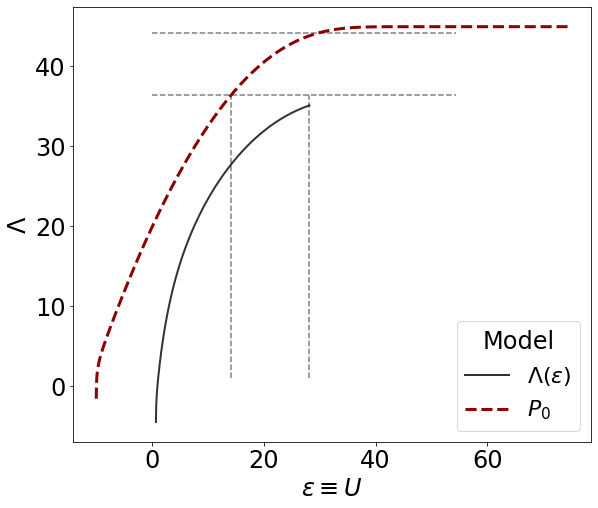

In [463]:

e0 = mean_lowest_effect
d = d_eff

#Ts = np.logspace(Log10Tmin, Log10Tmax, 1000)
F_PWM = -Ts*np.log(Z_PWM(PWM, Ts))
fig, ax = plt.subplots(figsize=(10,8), gridspec_kw={'left':0.18})

Us = F_PWM[:-1]-Ts[:-1]*(np.diff(F_PWM)/np.diff(Ts))
dU = np.diff(Us)
s = np.cumsum((1/Ts[:-2])*dU)
ax.plot(Us[:-1], np.log(np.cumsum(np.exp(s)*dU)), color = 'black', linewidth = 2, label = r'$\Lambda(\epsilon)$', alpha = .8, linestyle = '-')
ax.hlines([np.log(np.power(18.9,L)), s_PWM], min_E, max_E, linestyle = '--', color = 'grey')
ax.plot(es, np.log(np.cumsum(20**L*(2*np.pi*var_E)**(-0.5)*np.exp(-(es-avg_E)**2/(2*var_E))*de)), label = r'$P_0$', linewidth = 3, color = 'darkred', linestyle = '--')
ax.vlines([Us[np.where(np.log(np.cumsum(np.exp(s)*dU))<s_PWM)][-1], es[np.where(np.log(np.cumsum(20**L*(2*np.pi*var_E)**(-0.5)*np.exp(-(es-avg_E)**2/(2*var_E))*de))<s_PWM)][-1]], 1, s_PWM, linestyle = '--', color = 'grey')
#ax.plot(Us[:-1], (np.exp(s)*np.exp(-Us[:-1]))/Z_PWM(PWM, 1)*20**L, color = 'black', linewidth = 2, label = '$\Lambda(\epsilon)\cdot e^{\epsilon}$', alpha = .8, linestyle = '-')

#ax.hlines(1, min_E, max_E, color = 'black', linestyle = '--')

ax.legend(loc = 0, fontsize = 22, title = r'Model', title_fontsize = 24)
my_plot_layout(ax=ax, xscale = 'linear', yscale = 'linear', ylabel = '$\Lambda$', xlabel = r'$\epsilon\equiv U$')




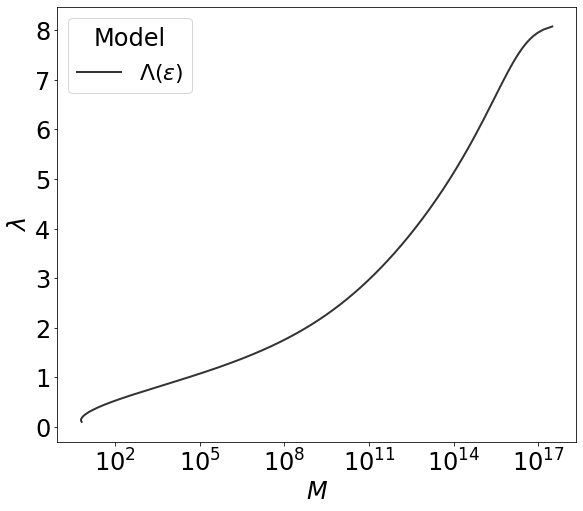

In [476]:

e0 = mean_lowest_effect
d = d_eff

#Ts = np.logspace(Log10Tmin, Log10Tmax, 1000)
F_PWM = -Ts*np.log(Z_PWM(PWM, Ts))
fig, ax = plt.subplots(figsize=(10,8), gridspec_kw={'left':0.18})

Us = F_PWM[:-1]-Ts[:-1]*(np.diff(F_PWM)/np.diff(Ts))
dU = np.diff(Us)
s = np.cumsum((1/Ts[:-2])*dU)
Ms = 1/(np.cumsum((np.exp(s)/(2*np.cumsum(np.exp(s)*dU)[-1])))*dU)
lambdas = 1/Ts[:-1]

ax.plot(Ms, lambdas[:-1], color = 'black', linewidth = 2, label = r'$\Lambda(\epsilon)$', alpha = .8, linestyle = '-')
ax.vlines(np.log10(np.power(20,L)), 0, 8)
#ax.hlines([18**L, 1], min_E, max_E, linestyle = '--', color = 'grey')

#ax.plot(es, np.log(np.cumsum(20**L*(2*np.pi*var_E)**(-0.5)*np.exp(-(es-avg_E)**2/(2*var_E))*de)), label = r'$P_0$', linewidth = 3, color = 'darkred', linestyle = '--')
#ax.vlines([Us[np.where(np.log(np.cumsum(np.exp(s)*dU))<s_PWM)][-1], es[np.where(np.log(np.cumsum(20**L*(2*np.pi*var_E)**(-0.5)*np.exp(-(es-avg_E)**2/(2*var_E))*de))<s_PWM)][-1]], 1, s_PWM, linestyle = '--', color = 'grey')
#ax.plot(Us[:-1], (np.exp(s)*np.exp(-Us[:-1]))/Z_PWM(PWM, 1)*20**L, color = 'black', linewidth = 2, label = '$\Lambda(\epsilon)\cdot e^{\epsilon}$', alpha = .8, linestyle = '-')

#ax.hlines(1, min_E, max_E, color = 'black', linestyle = '--')

ax.legend(loc = 0, fontsize = 22, title = r'Model', title_fontsize = 24)
my_plot_layout(ax=ax, xscale = 'log', yscale = 'linear', xlabel = '$M$', ylabel = r'$\lambda$')



In [487]:
2/np.log10(np.exp(1))

4.605170185988092

In [485]:
deltaE = 5/np.log10(np.exp(1))
s = deltaE*0.5
log(20)
np.exp(7)

1096.6331584284585

# $\lambda(N)$

N=2e+02
Finished iterating in: 0 seconds
N=2e+03
Finished iterating in: 8 seconds
N=2e+04
Finished iterating in: 74 seconds


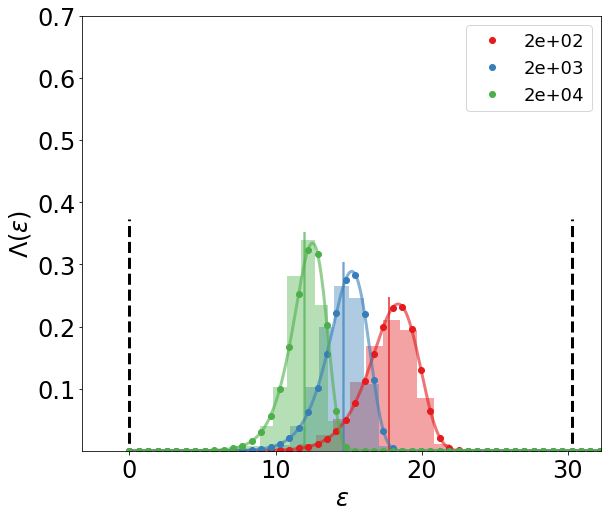

In [471]:
fig, ax = plt.subplots(figsize=(10,8), gridspec_kw={'left':0.18})
es = np.linspace(min_E, max_E+10, 10000)
de = es[1]-es[0]
Ns = [2e2, 2e3, 2e4]
alpha = 1
beta = .5
gamma = 0
linear = 0
energy_model = 'MJ'


def P_e_gaussian(avg_E, var_E, es):
    return (2*np.pi*var_E)**(-0.5)*np.exp(-(es-avg_E)**2/(2*var_E))
def P_min_e(N, es):
    return (N*(1-np.cumsum(P_e_gaussian(avg_E, var_E, es)*de))**(N-1)*(P_e_gaussian(avg_E, var_E, es)))


for n, N in enumerate(Ns):
    start_time = time. time()
    print('N=%0.0e'%N)
    data_bcells_ensemble = np.loadtxt(Text_files_path + 'Dynamics/Ensemble/bcells_ensemble_L-%d_N-%d_Antigen-'%(L, N)+antigen+'_alpha-%.6f_beta-%.6f_gamma-%.6f_linear-%d_'%(alpha, beta, gamma, linear)+energy_model+'.txt')
    data_energies_ensemble = np.loadtxt(Text_files_path + 'Dynamics/Ensemble/energies_tail_ensemble_L-%d_N-%d_Antigen-'%(L, N)+antigen+'_linear-%d_'%(linear)+energy_model+'.txt')
    N_final_active = np.loadtxt(Text_files_path + "Dynamics/Ensemble/N_final_active_L-%d_N-%d_Antigen-"%(L, N)+antigen+"_alpha-%.6f_beta-%.6f_gamma-%.6f_Linear-%d_"%(alpha, beta, gamma, linear)+energy_model+".txt")
    
    data_energies_ensemble = data_energies_ensemble[np.where(data_energies_ensemble[:,1]==1)[0],0]-e_MS
    
    N_final_active = np.concatenate(([0], N_final_active))
    N_final_active_cum = np.cumsum(N_final_active)
    best_binder_energies = np.array([])
    for i, N_final in enumerate(N_final_active_cum[:-1]):
        bcells_i = data_bcells_ensemble[int(N_final):int(N_final+N_final_active[i+1])]
        energies_i = data_energies_ensemble[int(N_final):int(N_final+N_final_active[i+1])]
        best_binder_energy_i = energies_i[np.flip(np.argsort(bcells_i))[0]]
        best_binder_energies = np.append(best_binder_energies, best_binder_energy_i)
    
    p_min_e = -np.diff((1-np.cumsum(P_e_gaussian(avg_E, var_E, es)*de))**N)/np.diff(es)
    plot_N = ax.plot(es[:-1], p_min_e, linewidth = 3, color = plt.cm.Set1(n), alpha = .6)
    ax.plot(es[::100], P_min_e(N, es)[::100], linestyle = '', marker = 'o',  color = plot_N[0].get_color(), label = '%.0e'%N)
    min_e_bar_1 = np.sum(es[:-1]*p_min_e*de)
    mir_e_bar_2 = np.sum(es*P_min_e(N, es)*de)
    ax.vlines([min_e_bar_1, mir_e_bar_2], ax.get_ylim()[0], ax.get_ylim()[1], color = plot_N[0].get_color(), alpha = .6)    
    ax.hist(best_binder_energies, bins = 10, density = True,color = plot_N[0].get_color(), alpha = .4)
    current_time = time. time()
    elapsed_time = current_time - start_time
    print("Finished iterating in: " + str(int(elapsed_time)) + " seconds")

ax.vlines([min_E, avg_E], ax.get_ylim()[0], ax.get_ylim()[1], color = 'black', linestyle = '--', linewidth = 3)  
#ax.plot(es, np.exp(-(es+np.exp(-es))), color = 'black')

my_plot_layout(ax=ax, xscale = 'linear', yscale = 'linear', xlabel = '$\epsilon$', ylabel = '$\Lambda(\epsilon)$')
ax.set_ylim(bottom=1e-10, top = 0.7)
ax.set_xlim(right = avg_E+2)
ax.legend(fontsize=18)
fig.savefig('../Figures/5_Geometric_exponent/P_min_e_N.png')


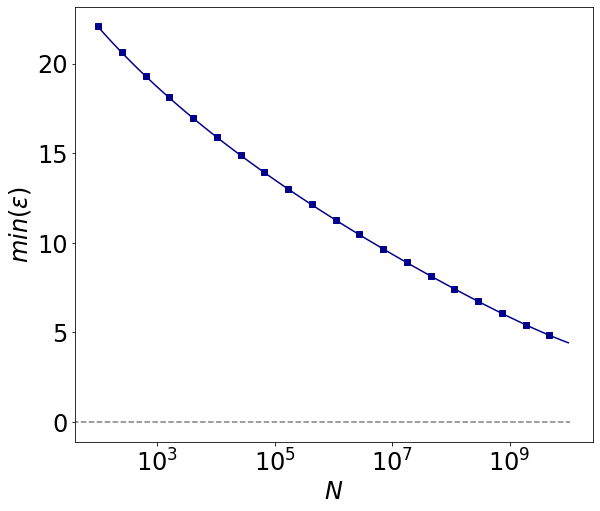

In [473]:
fig, ax = plt.subplots(figsize=(10,8), gridspec_kw={'left':0.18})
Ns = np.logspace(2, 10, 100)

min_Es1 = np.array([])
min_Es2 = np.array([])

for N in Ns:
    p_min_e = -np.diff((1-np.cumsum(P_e_gaussian(avg_E, var_E, es)*de))**N)/np.diff(es)
    min_Es1 = np.append(min_Es1, np.sum(es[:-1]*p_min_e*de)+3.2)
    min_Es2 = np.append(min_Es2, np.sum(es*P_min_e(N, es)*de)+3.2)

ax.plot(Ns[::5], min_Es1[::5], linestyle = '', marker = 's', color = 'darkblue')    
ax.plot(Ns, min_Es2, linestyle = '-', marker = '', color = 'darkblue')

ax.hlines([min_E], ax.get_xlim()[0], ax.get_xlim()[1], color = 'grey', linestyle='--')
#ax.vlines(10**L, ax.get_ylim()[0], ax.get_ylim()[1], color = 'grey', linestyle='--' )
my_plot_layout(ax=ax, xscale = 'log', yscale = 'linear', ylabel = '$min(\epsilon)$', xlabel = '$N$')
#ax.set_ylim(top=avg_E+3, bottom=min_E-3)
#ax.legend(fontsize=24)



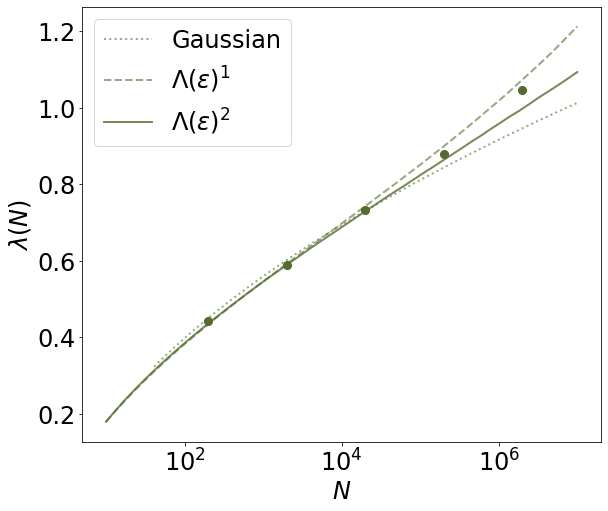

In [478]:
fig, ax = plt.subplots(figsize=(10,8), gridspec_kw={'left':0.18})

markers = ['o', '^', '*', 's', 'X']
exponents_rcs = np.array([])
vars_rcs = np.array([])
energy_model='MJ'
linear = 0
growth_models = ['exponential', 'linear']

lambda_Ns_file = open(Text_files_path+'Dynamics/Ensemble/lambda_Ns_alpha-%.2f_beta-%.2f_L-%d_'%(alpha, beta, L)+growth_models[linear]+'_'+energy_model+'.pkl','rb')
data =  pickle.load(lambda_Ns_file)
lambdas_simulation = data[0]
vars_rcs_exponent = data[1]
lambda_Ns_file.close()

lambd_gaussian = np.array([])
Ns_array = np.logspace(1, 7, 50)
Ns = np.array([2e2, 2e3, 2e4, 2e5, 2e6])

for N in Ns_array:
    p_min_e = -np.diff((1-np.cumsum(P_e_gaussian(avg_E, var_E, es)*de))**N)/np.diff(es)
    avg_min_E = np.sum(es[:-1]*p_min_e*de)+3.2
    lambd_gaussian = np.append(lambd_gaussian, (avg_E-avg_min_E)/var_E)

ax.plot(Ns_array[5:], lambd_gaussian[5:], label = 'Gaussian', linestyle = ':', linewidth= 2, alpha = .6, color = 'darkolivegreen')

lambd_Lambda = np.array([])
Us_N = np.array([])
lambd_Lambda2 = np.array([])

for N in Ns_array:
    avg_min_E = np.sum(es*P_min_e(N, es)*de)+3.2
    lambd_Lambda = np.append(lambd_Lambda, lambdas[np.where(Us<avg_min_E)[0][-1]])
    Us_N = np.append(Us_N, Us[np.where(1/np.cumsum(np.exp(s)/(2*np.cumsum(np.exp(s)*dU)[-1])*dU)>N)[0][-1]])
    lambd_Lambda2 = np.append(lambd_Lambda2, lambdas[np.where(Us<(Us_N[-1]+3.2))[0][-1]])

ax.plot(Ns_array, lambd_Lambda, label = r'$\Lambda(\epsilon) ^1$', linestyle = '--', linewidth= 2, alpha = .6, color = 'darkolivegreen')
ax.plot(Ns_array, lambd_Lambda2, color = 'darkolivegreen', linewidth = 2, label = r'$\Lambda(\epsilon) ^2$', alpha = .8, linestyle = '-')

for n, N in enumerate(Ns):
    ax.scatter(N, lambdas_simulation[n], color = 'darkolivegreen', s = 65)

my_plot_layout(ax=ax, xscale = 'log', yscale = 'linear', ylabel = '$\lambda(N)$', xlabel = '$N$')
ax.legend(fontsize=24)
fig.savefig('../Figures/5_Geometric_exponent/lambda_N.pdf')



In [479]:
2/(np.log10(np.exp(1)))

4.605170185988092

## Some estimates

1.0


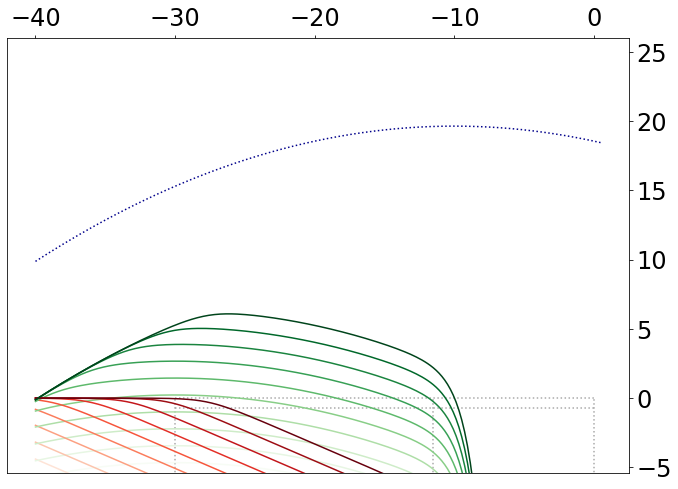

In [311]:

e_R = 6
k_on = 1e6
k_off_limit = 10
e0 = 2
L = 20
sigma = ((e0-e0/2)**2 + (0-e0/2)**2)/2
print(sigma)
Sigma = L*(sigma)
mus = np.linspace(np.log(10**(-23)), np.log(10**(-23+11)), 10)
alphas = np.linspace(0, 1, len(mus))
colors_mu = plt.cm.Greens(np.linspace(0, 1, len(mus)))
colors_mu2 = plt.cm.Reds(np.linspace(0, 1, len(mus)))
e_bar = -10
e = np.linspace(-L*e0/2+e_bar - 10, .5, 200)

def S(e):
    return np.log10(np.exp(-(e-e_bar)**2/(2*Sigma))) + L*np.log10(10) - 0.5*np.log10(2*np.pi*Sigma) + .7
def S2(e):
    return np.log10(sc.comb(L, (e-e_bar)/e0+L/2))# - np.log(sc.comb(L, L/2))
A = np.log(1/(1+np.exp(-e-6)))
#R = np.log(1/(1+np.exp(e+e_R)))
def R(e, mu):
    return - np.log10(1+np.exp(e-mu)) + np.log10(np.exp(-np.exp(e)/(k_off_limit/k_on)))
def R_approx(e, mu):
    return - np.log10(np.exp(e - mu)) + np.log10(np.exp(-np.exp(e)/(k_off_limit/k_on)))

#------------------------------------------------------------------------------------

fig, ax = plt.subplots(figsize=(12,8), gridspec_kw={'left':0.18})
#------------------------------------------------------------------------------------
ax.plot(e, S(e), color = 'darkblue', linestyle = 'dotted')
#ax.plot(e, S2(e), color = 'darkblue', linestyle = '-')
for i, mu in enumerate(mus):
    ax.plot(e, R(e, mu), color = colors_mu2[i], alpha = alphas[-1])
    #ax.plot(e, R_approx(e, mu), color = colors_mu2[i], linestyle = 'dashed', alpha = alphas[-1])
    ax.plot(e, R(e, mu) + -10 + S(e), color = colors_mu[i], alpha = alphas[-1])
    #ax.plot(e, R_approx(e, mu) + -2 + S2(e), color = colors_mu[i], linestyle = 'dashed', alpha = alphas[-1])

ax.vlines([-L*e0/2+e_bar, 0, np.log(k_off_limit/k_on)], -L*e0/2, 0, linestyle = 'dotted', color='darkgrey')
ax.hlines([0, np.log(.5)], -L*e0/2 - 10, 0, linestyle = 'dotted', color='darkgrey')

my_plot_layout(ax=ax)
ax.set_ylim(-5.4, L*np.log10(20))
ax.xaxis.tick_top()
ax.yaxis.tick_right()


# Other analysis from the partition function Z

## MM model

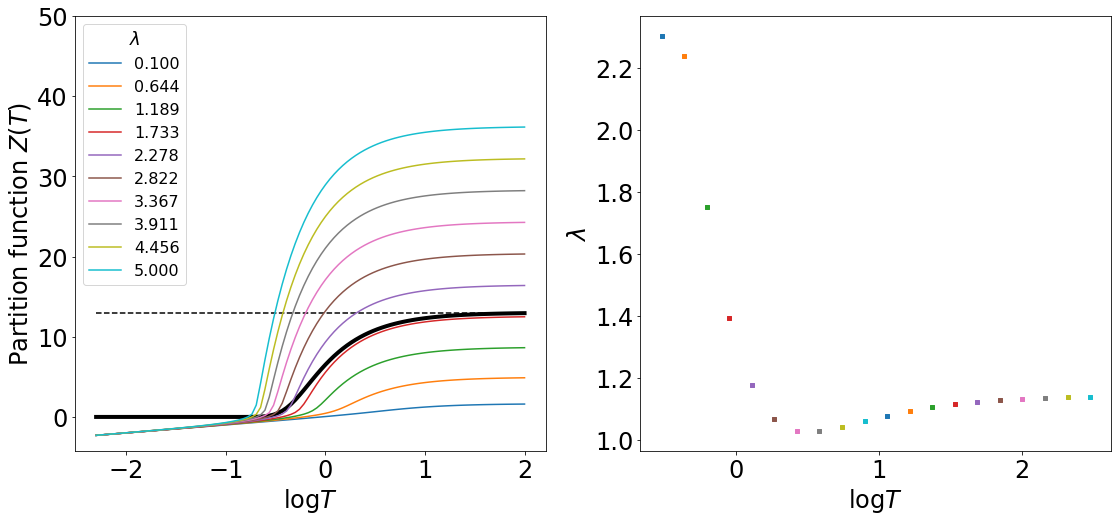

In [17]:
d=20
e0=1.7
L=10

Log10Tmin = np.log10(.005)
Log10Tmax = np.log10(100)

Ts = np.logspace(Log10Tmin, Log10Tmax, 100)

fig, ax = plt.subplots(1, 2, figsize=(20,8), gridspec_kw={'left':0.18})

ax[0].plot(np.log10(Ts), np.log10(Z(Ts, d, L, e0)), linewidth = 4, color = 'black', linestyle='-', marker = '')
ax[0].hlines(np.log10(d**L), (Log10Tmin), (Log10Tmax), linestyle='--', color = 'black')

lamdas = np.linspace(.1, 5, 10)

for lamda in lamdas:
    ax[0].plot(np.log10(Ts), np.log10(Z_integral(Ts, lamda, 1)), label = '%.3f'%(lamda))
    
ax[0].legend(loc = 0, fontsize = 16, title = r'$\lambda$', title_fontsize = 18)
my_plot_layout(ax=ax[0], xscale = 'linear', yscale = 'linear', xlabel = '$\log{T}$', ylabel = 'Partition function $Z(T)$')
ax[0].set_ylim(top=50)


Log10Tmin = np.log10(.28)
Log10Tmaxs = np.linspace(np.log10(.3), np.log10(300), 20)
   
for Log10Tmax in Log10Tmaxs:
    
    Ts = np.logspace(Log10Tmin, Log10Tmax, 100)

    popt, pcov = curve_fit(Z_integral, xdata=(Ts), ydata=(Z(Ts, d, L, e0)), p0 = (1, 1000))
    ax[1].scatter(Log10Tmax, popt[0], marker = 's', s = 10)
    
my_plot_layout(ax=ax[1], xscale = 'linear', yscale = 'linear', xlabel = '$\log{T}$', ylabel = r'$\lambda$')


fig.savefig('../Figures/5_Geometric_exponent/Z_MM.png')


## PWM model

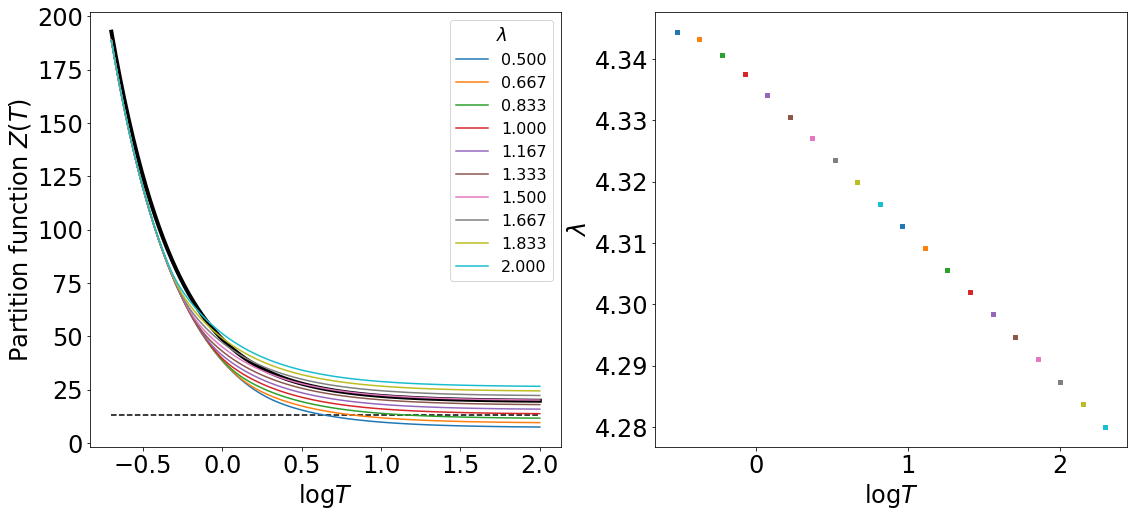

In [18]:
fig, ax = plt.subplots(1, 2, figsize=(20,8), gridspec_kw={'hspace':2, 'left':0.18})

Log10Tmin = np.log10(.2)
Log10Tmax = np.log10(100)

Ts = np.logspace(Log10Tmin, Log10Tmax, 100)

ax[0].plot(np.log10(Ts), np.log10(Z_PWM(PWM, Ts)), linewidth = 4, color = 'black', linestyle='-', marker = '')
ax[0].hlines(np.log10(np.power(len(Alphabet), L)), (Log10Tmin), Log10Tmax, linestyle='--', color = 'black')

lamdas = np.linspace(.5, 2, 10)

for l, lamda in enumerate(lamdas):
    ax[0].plot(np.log10(Ts), np.log10(Z_PWM_integral2(Ts, lamda)), label = '%.3f'%(lamda))#, color = plt.cm.Blues(np.linspace(0, 1, len(lamdas)+1))[l])
    #ax.plot(Ts, Z_PVM_2(PVM, Ts, min_E, avg_E, max_E)[1], color = plt.cm.Reds(np.linspace(0, 1, len(lamdas)+1))[l], label = '%.3f'%(lamda))
    
ax[0].legend(loc = 0, fontsize = 16, title = r'$\lambda$', title_fontsize = 18)
my_plot_layout(ax=ax[0], xscale = 'linear', yscale = 'linear', xlabel = '$\log{T}$', ylabel = 'Partition function $Z(T)$')
#ax.set_ylim(top=30)


Log10Tmin = np.log10(.2)
Log10Tmaxs = np.linspace(np.log10(.3), np.log10(200), 20)
   
for Log10Tmax in Log10Tmaxs:
    
    Ts = np.logspace(Log10Tmin, Log10Tmax, 200)
    popt, pcov = curve_fit(Z_PWM_integral, xdata=Ts, ydata=Z_PWM(PWM, Ts), p0 = (1, 100))
    ax[1].scatter(Log10Tmax, popt[0], marker = 's', s = 10)
    
#ax.hlines(d**L, 10**(Log10Tmin), 10**(Log10Tmax), linestyle='--', color = 'black')
#ax.legend(loc = 0, fontsize = 16, title = r'$\lambda$', title_fontsize = 18)
my_plot_layout(ax=ax[1], xscale = 'linear', yscale = 'linear', xlabel = '$\log{T}$', ylabel = '$\lambda$')


fig.savefig('../Figures/5_Geometric_exponent/Z_MJ.png')


1.21e+24 8.00e+06


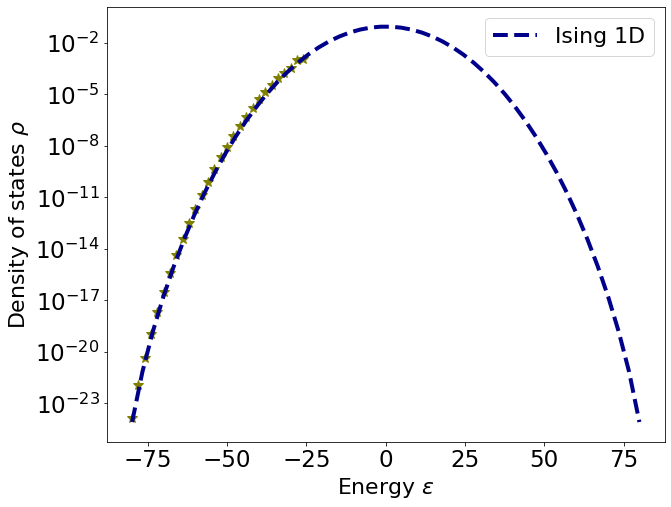

In [19]:
data=(np.loadtxt('../Codes/Ising_model/output.txt'))
E = data[:,0]
fig, ax = plt.subplots(figsize = (10,8))
L = 80
h = 20
ds = np.linspace(0, L );
data_E = np.histogram(E, bins = 'auto', density = True);
ax.plot(data_E[1][:-1], data_E[0]/(1e10*(2**(L))**(-1)*np.exp(-data_E[1][:-1]/1)), color = 'olive', linestyle = '', marker = '*', ms = 10);
#ax.plot(data_E[1][:-1], data_E[0], color = 'olive', linestyle = '', marker = '*', ms = 10);

#ax.plot(data_E[1][:-1], (2**(50))**(-1)*np.exp(-data_E[1][:-1]/1)*sc.comb(L, (data_E[1][:-1]+L)/2), color = 'olive', linestyle = '--', marker = '', ms = 10);
ax.plot(ds*2-L, sc.comb(L, ds)/2**(L) , linewidth = 4 , label = 'Ising 1D', color = 'darkblue', linestyle = '--');
ax.set_yscale('log');
ax.set_yscale('log');
ax.set_xlabel('Energy $\epsilon$', fontsize = 22)
ax.set_ylabel(r'Density of states $\rho$', fontsize = 22)
ax.tick_params(labelsize = 23)
ax.legend(loc = 0, fontsize = 22)
fig.savefig('../Figures/Density_of_States_MCMC_Ising1D_temperature.png')
print('%.2e'%(2**80),'%.2e'%(len(E)))
